# Link with Kaggle dataset


In [ ]:
!pip install q kaggle

In [ ]:
from google.colab import files
files.upload() # Upload your JSON file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abanoubemad647","key":"70663cc051634aceb6628bf5f24dce3d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions to read/write only for the owner

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!kaggle competitions download -c rossmann-store-sales

  0% 0.00/6.99M [00:00<?, ?B/s]
100% 6.99M/6.99M [00:00<00:00, 1.11GB/s]


In [ ]:
!unzip rossmann-store-sales.zip

Archive:  rossmann-store-sales.zip
  inflating: sample_submission.csv   
  inflating: store.csv               
  inflating: test.csv                
  inflating: train.csv               


# Data Collecting

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load datasetes
train = pd.read_csv('/content/train.csv')
store = pd.read_csv('/content/store.csv')
test = pd.read_csv('/content/test.csv')
store_df = store.copy()

<ipython-input-7-277b89e23973>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/train.csv')


In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


NameError: name 'df' is not defined

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


In [ ]:
store.isnull().sum().sum()

np.int64(2343)

In [ ]:
store.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


<Axes: >

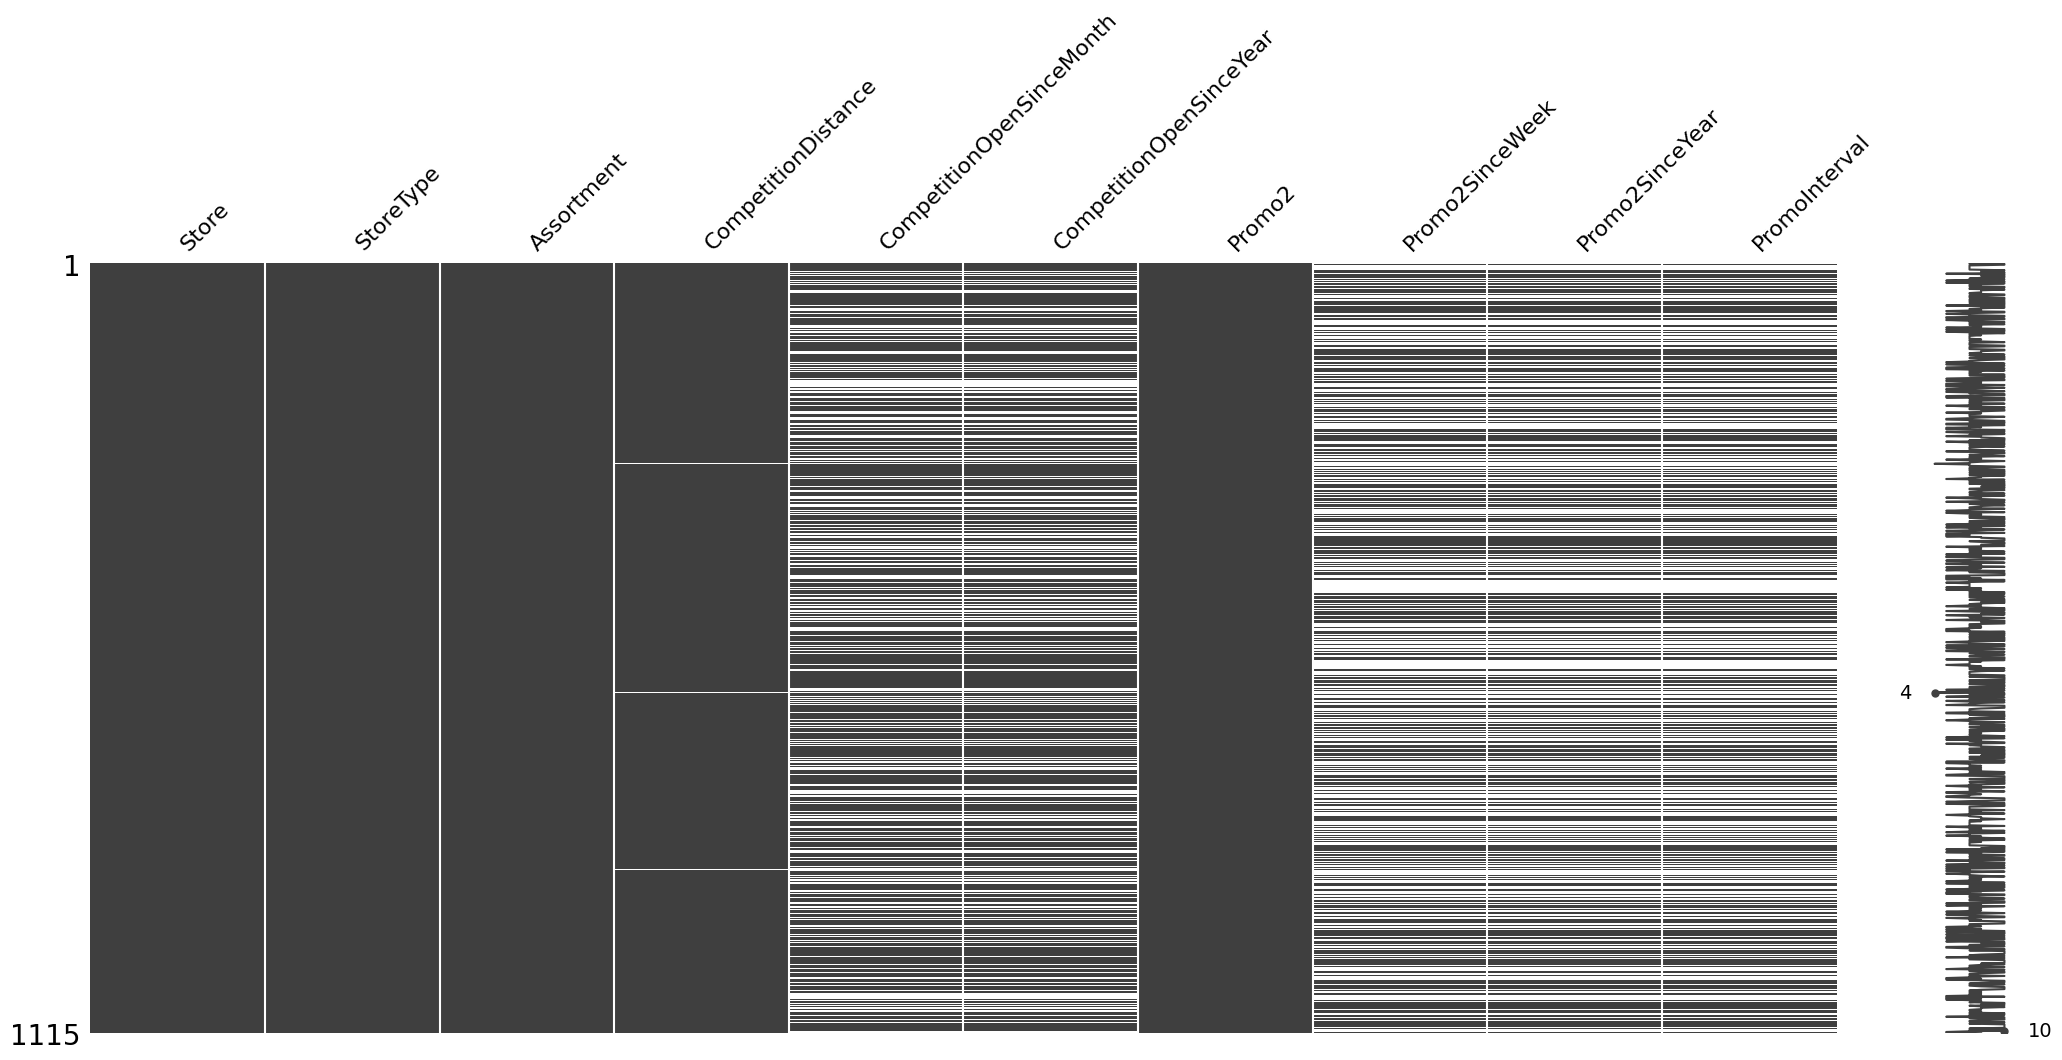

In [ ]:
import missingno as msno
msno.matrix(store)

# Exploratory Data Analysis EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [ ]:

store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].median())
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(0)
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(0)

store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)
store['PromoInterval'] = store['PromoInterval'].fillna('')

store['HasCompetition'] = np.where(store['CompetitionOpenSinceYear'] > 0, 1, 0)
store['HasPromo2'] = np.where(store['Promo2'] == 1, 1, 0)

print("\n=== AFTER CLEANING ===")
print(store.isnull().sum().sort_values(ascending=False))


=== AFTER CLEANING ===
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
HasCompetition               0
HasPromo2                    0
dtype: int64


In [ ]:

current_year = datetime.now().year
store['CompetitionTenure'] = np.where(
    store['HasCompetition'] == 1,
    current_year - store['CompetitionOpenSinceYear'],
    0
)

promo_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month in promo_months:
    store[f'Promo_{month}'] = store['PromoInterval'].str.contains(month).astype(int)

store['StoreAge'] = store['Store'].max() - store['Store']

store['CompetitionDistanceCategory'] = pd.cut(
    store['CompetitionDistance'],
    bins=[0, 500, 1000, 2000, 5000, 10000, 20000, 50000, float('inf')],
    labels=['Very Close', 'Close', 'Medium', 'Far', 'Very Far', 'Distant', 'Very Distant', 'Extremely Distant']
)

store[['Store', 'CompetitionDistance', 'CompetitionTenure', 'StoreAge', 'CompetitionDistanceCategory']].head()

,Store,CompetitionDistance,CompetitionTenure,StoreAge,CompetitionDistanceCategory
0,1,1270.0,17.0,1114,Medium
1,2,570.0,18.0,1113,Close
2,3,14130.0,19.0,1112,Distant
3,4,620.0,16.0,1111,Close
4,5,29910.0,10.0,1110,Very Distant


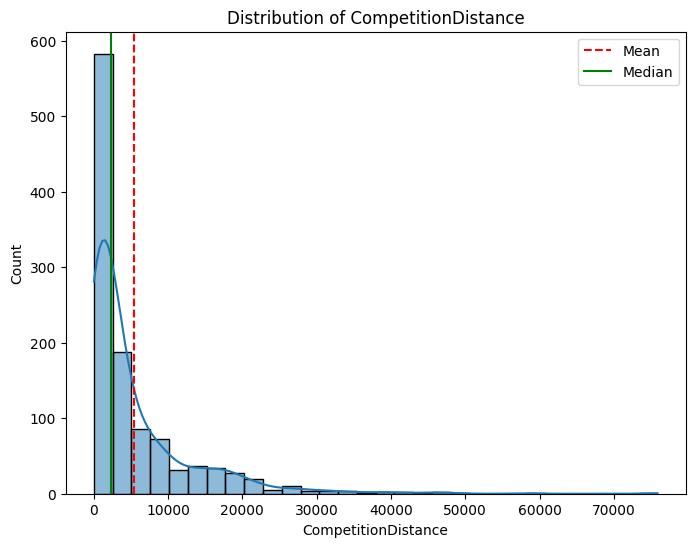

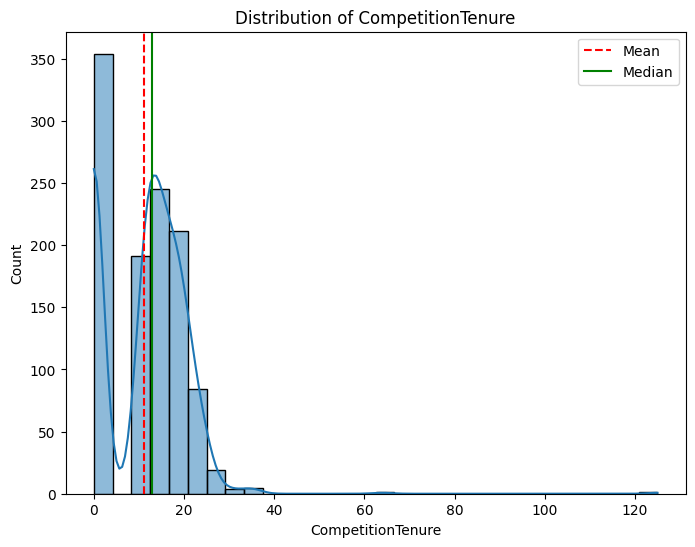

In [ ]:
def plot_distribution(col, bins=30, kde=True):
    plt.figure(figsize=(8,6))
    sns.histplot(store[col], bins=bins, kde=kde)
    plt.title(f'Distribution of {col}')
    plt.axvline(store[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(store[col].median(), color='g', linestyle='-', label='Median')
    plt.legend()
    plt.show()

plot_distribution('CompetitionDistance')
plot_distribution('CompetitionTenure')

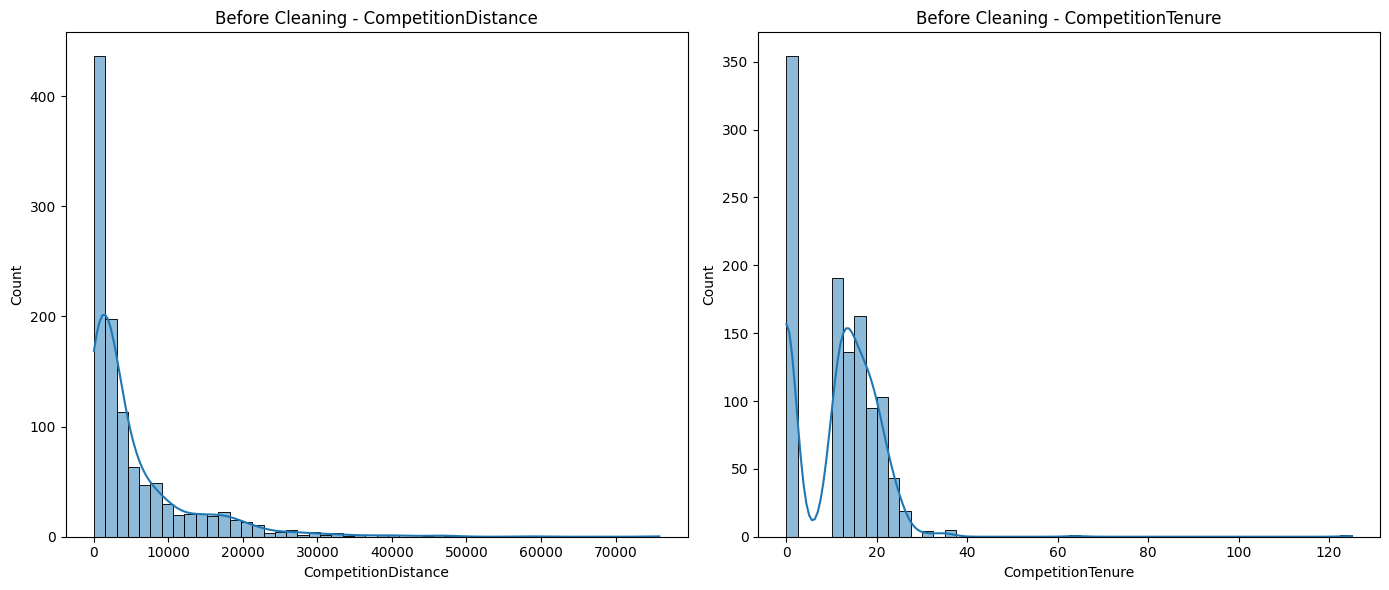

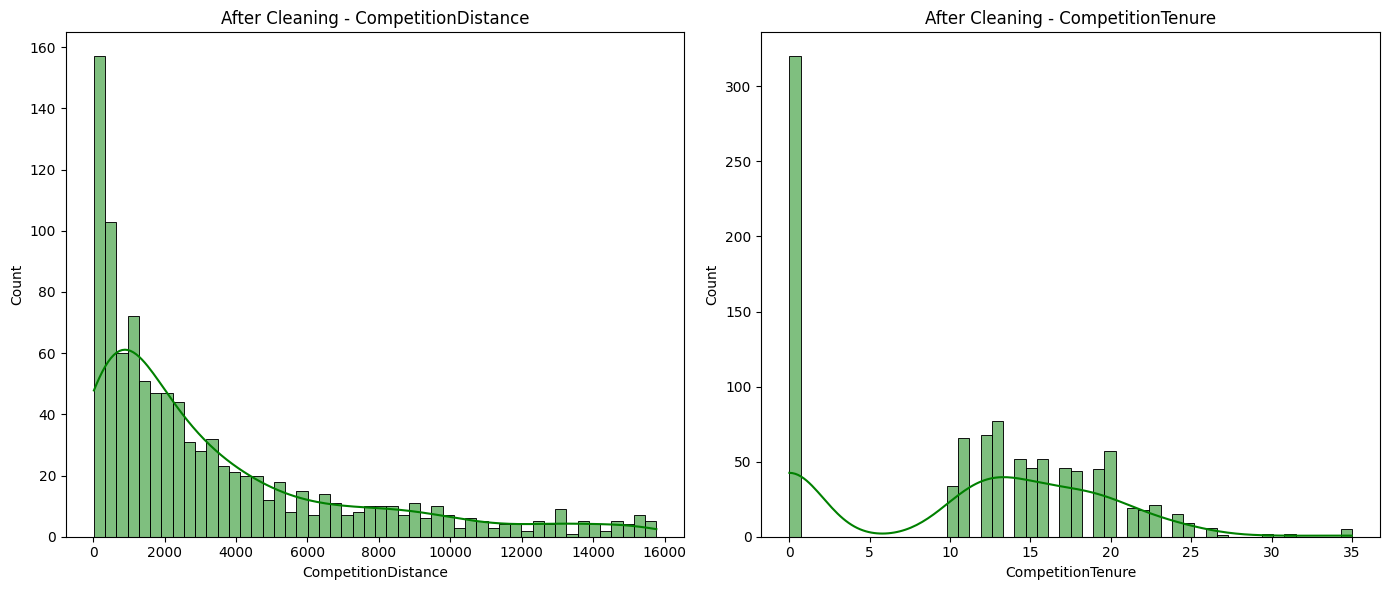

In [ ]:


# Function to remove outliers using IQR
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Plot distributions before cleaning
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(store['CompetitionDistance'], bins=50, kde=True)
plt.title('Before Cleaning - CompetitionDistance')

plt.subplot(1, 2, 2)
sns.histplot(store['CompetitionTenure'], bins=50, kde=True)
plt.title('Before Cleaning - CompetitionTenure')

plt.tight_layout()
plt.show()

# Remove outliers
store_cleaned = remove_outliers_iqr(store, 'CompetitionDistance')
store_cleaned = remove_outliers_iqr(store_cleaned, 'CompetitionTenure')

# Plot distributions after cleaning
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(store_cleaned['CompetitionDistance'], bins=50, kde=True, color='green')
plt.title('After Cleaning - CompetitionDistance')

plt.subplot(1, 2, 2)
sns.histplot(store_cleaned['CompetitionTenure'], bins=50, kde=True, color='green')
plt.title('After Cleaning - CompetitionTenure')

plt.tight_layout()
plt.show()

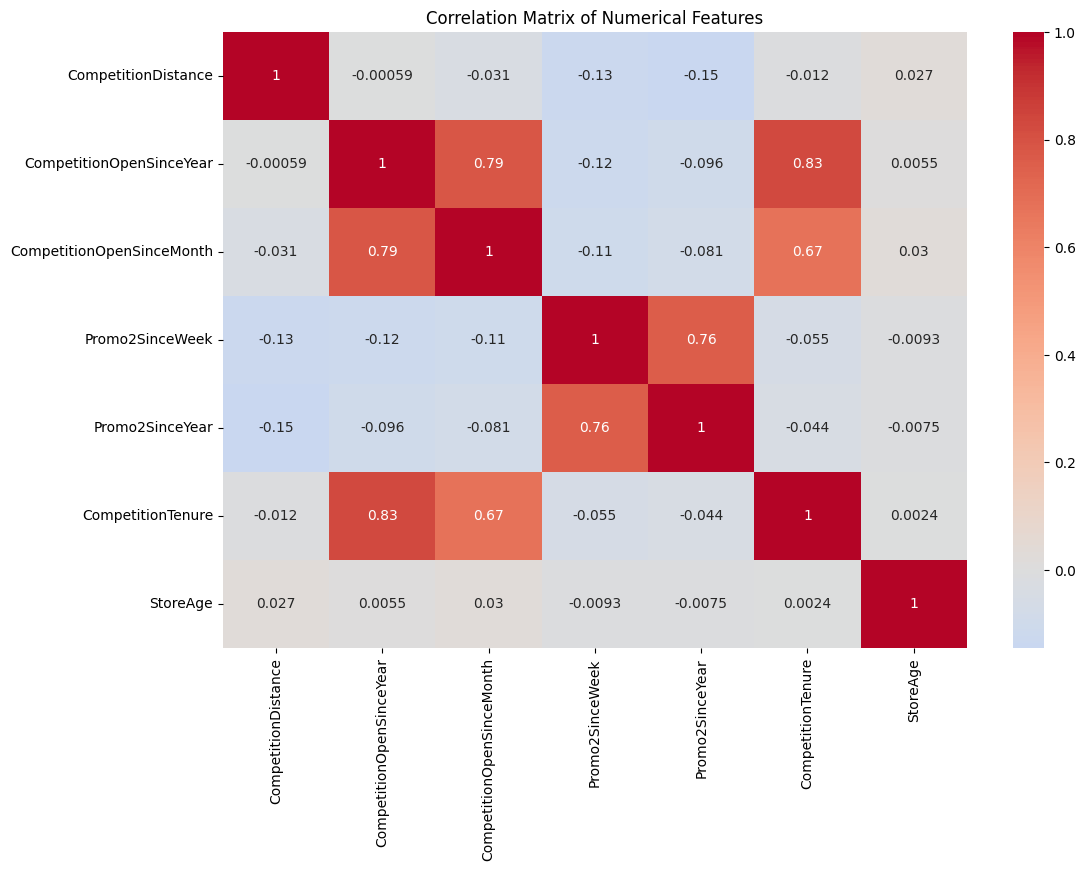

In [ ]:
# CORRELATION ANALYSIS
numerical_features = ['CompetitionDistance', 'CompetitionOpenSinceYear',
                     'CompetitionOpenSinceMonth', 'Promo2SinceWeek',
                     'Promo2SinceYear', 'CompetitionTenure', 'StoreAge']

plt.figure(figsize=(12,8))
sns.heatmap(store[numerical_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

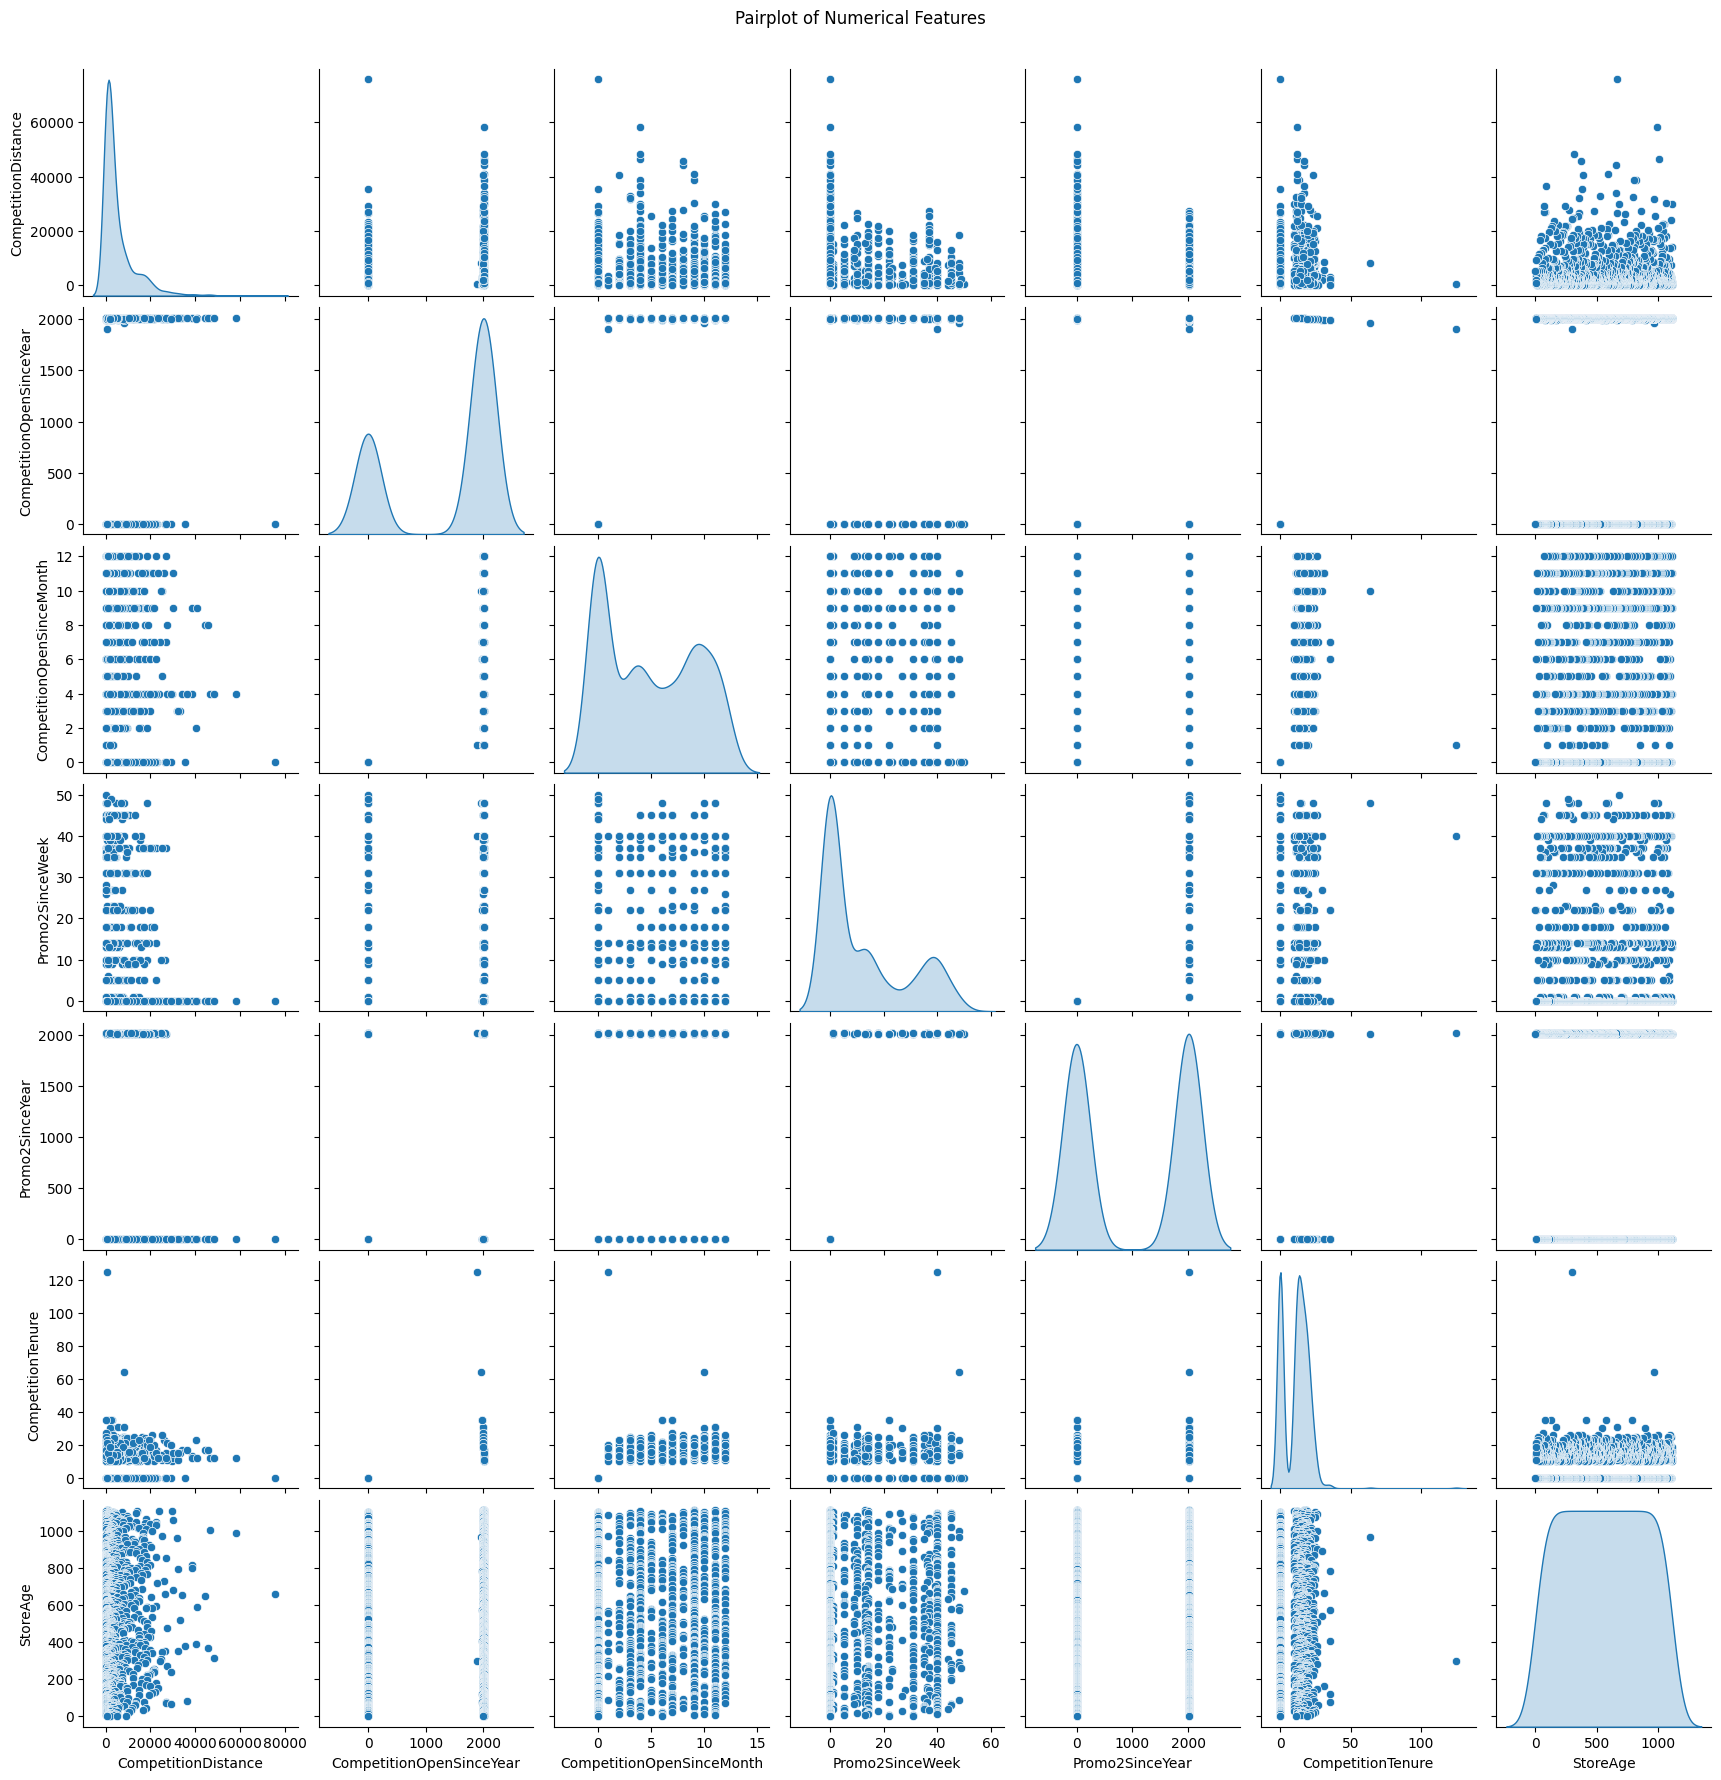

In [ ]:
g = sns.pairplot(store[numerical_features], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
#modify x & y labels
for i, ax in enumerate(g.axes[-1, :]):
    ax.set_xlabel(numerical_features[i])

for i, ax in enumerate(g.axes[:, 0]):
    ax.set_ylabel(numerical_features[i])
plt.show()

In [ ]:
#  INTERACTIVE VISUALIZATIONS

fig = px.box(store, x='StoreType', y='CompetitionDistance',
             points=False, log_y=True,
             title='Competition Distance by Store Type (Interactive)')
fig.show()

fig = px.scatter(store, x='CompetitionTenure', y='CompetitionDistance',
                 color='StoreType', log_y=True,
                 title='Competition Tenure vs Distance')
fig.show()

promo_by_type = store.groupby('StoreType')['Promo2'].mean().reset_index()
fig = px.bar(promo_by_type, x='StoreType', y='Promo2',
             title='Promo2 Participation Rate by Store Type',
             labels={'Promo2': 'Participation Rate'})
fig.show()

# Data Cleaning and Pre-Processing

In [ ]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'HasCompetition',
       'HasPromo2', 'CompetitionTenure', 'Promo_Jan', 'Promo_Feb', 'Promo_Mar',
       'Promo_Apr', 'Promo_May', 'Promo_Jun', 'Promo_Jul', 'Promo_Aug',
       'Promo_Sep', 'Promo_Oct', 'Promo_Nov', 'Promo_Dec', 'StoreAge',
       'CompetitionDistanceCategory'],
      dtype='object')

In [ ]:
store.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


# Building ML Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score


##### 2.Merge store data with sales data

In [ ]:
df = pd.merge(train, store_df, on='Store')


In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

##### 3. Drop rows with 0 sales (if applicable)

In [ ]:
df = df[df['Sales'] > 0] # 3. Drop rows with 0 sales (if applicable)


##### 4. Define target and features


In [ ]:
target = 'Sales'

features = [ 'StoreType', 'Assortment', 'CompetitionDistance',
                      'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
                      'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

X = df[features]
y = df[target]

##### 5. Identify categorical and numeric columns


In [ ]:
categorical_cols = ['StoreType', 'Assortment', 'PromoInterval', 'CompetitionDistance']

numeric_cols = [col for col in X.columns if col not in categorical_cols]


In [ ]:
def convert_to_str(X):
    return X.astype(str)


###### 6. Build preprocessing pipeline


In [ ]:
numeric_transformer = SimpleImputer(strategy='mean')
from sklearn.preprocessing import FunctionTransformer

FunctionTransformer(lambda x: x.astype(str))
FunctionTransformer(convert_to_str)



categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('to_str', FunctionTransformer(convert_to_str)),  # ✅ No lambda
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


##### 7. Build complete pipeline with XGBoost

In [ ]:
# 7. Build complete pipeline with XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])


##### 8. Train/test split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### 9. Fit model


In [ ]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['CompetitionOpenSinceMonth',
                                                   'CompetitionOpenSinceYear',
                                                   'Promo2', 'Promo2SinceWeek',
                                                   'Promo2SinceYear']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('to_str',
                                                                   FunctionTransformer(func=<function convert_to_str at 0x7cac214...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
new_data = pd.DataFrame([{
    'StoreType': 'a',
    'Assortment': 'b',
    'CompetitionDistance': 500.0,
    'CompetitionOpenSinceMonth': 6,
    'CompetitionOpenSinceYear': 2010,
    'Promo2': 1,
    'Promo2SinceWeek': 20,
    'Promo2SinceYear': 2013,
    'PromoInterval': 'Feb,May,Aug,Nov'
}])

# Predict
predicted_sales = model.predict(new_data)

In [ ]:
import joblib
joblib.dump((model, features), "model.pkl")

['model.pkl']

In [ ]:
from google.colab import files
files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Evaluting the ML Model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation on Test Set:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Evaluation on Test Set:
R² Score: 0.3476
Mean Absolute Error: 1914.06
Root Mean Squared Error: 2509.05


# Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print("\nCross-Validation Results:")
print("RMSE Scores:", np.round(cv_rmse_scores, 2))
print("Average RMSE:", np.mean(cv_rmse_scores).round(2))


Cross-Validation Results:
RMSE Scores: [2509.05 2496.82 2513.35 2504.3  2523.79]
Average RMSE: 2509.46


# Model optmization

Model optimization (or hyperparameter tuning) is the process of systematically searching for the best combination of hyperparameters to improve model performance. Here's how it works in the code example I gave you using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100],                # Fix to a common value
    'regressor__max_depth': [10, 20],                # Narrow range
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}



In [ ]:
# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from scipy.stats import randint

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Replace with your ColumnTransformer or scaler
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define a smaller, randomized hyperparameter distribution
param_dist = {
    'regressor__n_estimators': randint(50, 200),
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': randint(2, 6),
    'regressor__min_samples_leaf': randint(1, 4)
}

# Randomized search with 3-fold CV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,                  # Only 20 random combinations
    cv=3,                       # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,                  # Use all processors
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best parameters:", random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


# Deployment